In [ ]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Importing Required Libraries

In [3]:
np.random.seed(42)

house_types = ['Flat', 'Bungalow', 'Duplex', 'Triplex', 'Tenament']
cities = ['Vadodara', 'Ankleshwar', 'Surat']
areas = {
    'Vadodara': ['Alkapuri', 'Gotri', 'Manjalpur', 'Akota', 'Subhanpura'],
    'Ankleshwar': ['GIDC', 'Valia Road', 'Kapodra', 'Rajpipla Road'],
    'Surat': ['Adajan', 'Vesu', 'Katargam', 'Piplod', 'Varachha']
}

city_multiplier = {'Vadodara': 350, 'Ankleshwar': 250, 'Surat': 400}
type_multiplier = {'Flat': 1.0, 'Bungalow': 1.5, 'Duplex': 1.3, 'Triplex': 1.7, 'Tenament': 0.9}

records = []
for _ in range(100):  # Increased records to 100
    house_type = random.choice(house_types)
    city = random.choice(cities)
    area = random.choice(areas[city])
    size = np.random.randint(600, 5000)
    rooms = np.random.randint(1, 8)
    age = np.random.randint(0, 31)

    base_price = size * city_multiplier[city]
    price = base_price * type_multiplier[house_type]
    price += (rooms * 10000) - (age * 1500)
    price += np.random.randint(-50000, 50000)

    records.append({
        'Size': size,
        'HouseType': house_type,
        'City': city,
        'Area': area,
        'Rooms': rooms,
        'Age': age,
        'Price': int(price)
    })

df = pd.DataFrame(records)
df.to_csv('synthetic_house_prices.csv', index=False)
print("Dataset saved as 'synthetic_house_prices.csv'")
df.head()

#Generating Synthetic Dataset

Dataset saved as 'synthetic_house_prices.csv'


,Size,HouseType,City,Area,Rooms,Age,Price
0,1460,Bungalow,Surat,Katargam,7,10,957820
1,1066,Tenament,Surat,Vesu,7,10,476258
2,4044,Duplex,Surat,Katargam,4,7,2098403
3,730,Tenament,Surat,Varachha,6,20,243569
4,2991,Tenament,Ankleshwar,Valia Road,4,29,687444


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Size       100 non-null    int64 
 1   HouseType  100 non-null    object
 2   City       100 non-null    object
 3   Area       100 non-null    object
 4   Rooms      100 non-null    int64 
 5   Age        100 non-null    int64 
 6   Price      100 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.6+ KB
None
              Size       Rooms         Age         Price
count   100.000000  100.000000  100.000000  1.000000e+02
mean   2716.510000    3.830000   16.230000  1.192138e+06
std    1183.467611    2.103652   10.026082  6.619728e+05
min     730.000000    1.000000    0.000000  2.435690e+05
25%    1750.250000    2.000000    7.000000  6.406782e+05
50%    2598.000000    4.000000   19.000000  1.001860e+06
75%    3771.250000    6.000000   25.000000  1.565174e+06
max    4876.000000    7.000000   30

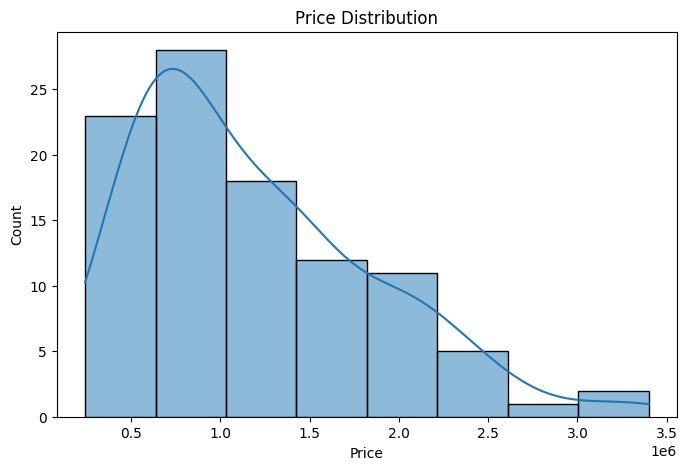

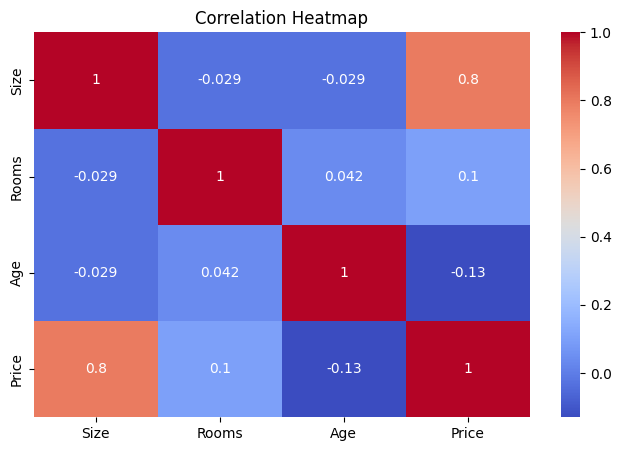

In [4]:
print(df.info())
print(df.describe())

plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True)
plt.title('Price Distribution')
plt.show()

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Exploratory Data Analysis

In [5]:
X = df.drop('Price', axis=1)
y = df['Price']

categorical_features = ['HouseType', 'City', 'Area']
numerical_features = ['Size', 'Rooms', 'Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
    ]
)

#Preprocessing Dataset

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train-Test Split

In [7]:
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

#Linear Regression Pipeline

In [8]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

#Random Forest Pipeline

In [9]:
def evaluate_model(name, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}\n")

#Function Evaluation 

In [10]:
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

#Evaluating Both Models

Linear Regression Performance:
Mean Squared Error: 37823865937.69
R2 Score: 0.94

Random Forest Performance:
Mean Squared Error: 121435671381.63
R2 Score: 0.81



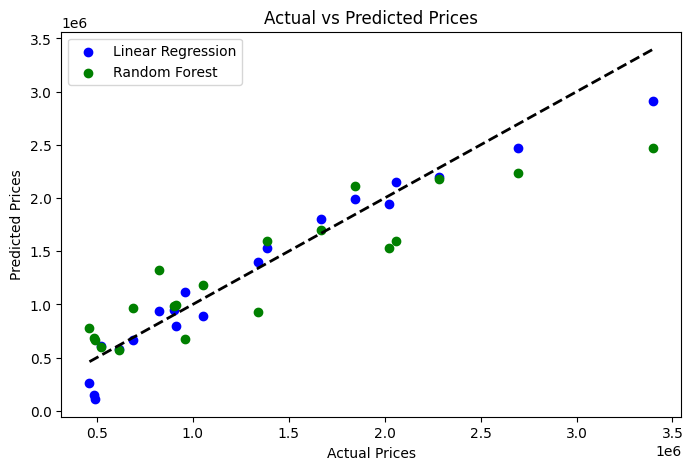

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, color='blue', label='Linear Regression')
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

#Visualizations

In [ ]:
Thank You!